In [35]:
%matplotlib inline

import matplotlib.pyplot as plt #using matplotlib.pyplot for data visualization
import pandas as pd #using pandas to read datafile
import numpy as np
from pandas import Series
from __future__ import division
import glob
import datetime as dt
from os import listdir
import glob
import os

**Discharge**

In [36]:
#Loading in all the discharge files from my pythonfolder.
files1 = list(glob.iglob('**/Daily Discharge/*.txt',recursive=True))
files2 = list(glob.iglob('**/Daily Discharge/*.TXT',recursive=True))
files = files1+files2 #Merging the datasets into one dataset
files.sort()
files = list(set(files))
STNS = {}
discharge = pd.DataFrame()

#Creating a loop to arrange the data
for infile in files:
    with open(infile, 'r') as f:
        meta = f.readlines()[0:5]
        stnid = meta[0].strip().split(':')[1]
        stnid = stnid.strip()
        tmp = meta[1].strip().split()
        tmp.pop(tmp.index('Latitude:'))
        tmp.pop(tmp.index('Location:'))
        latitude = ':'.join(tmp[-3:])
        latitude = latitude.split(':')
        latitude = list(map(int,latitude))
        latitude = (latitude[0]+latitude[1]/60+latitude[2]/3600)
        river = ' '.join(tmp[:-3])
        year = (meta[4].strip().split(':'))[1].strip()
        
    ws = [4,9,7,7,7,7,7,7,7,7,7,7,7]
    
    #Reading the file and setting the header row to the 9th line, and reading only 31 lines after that  
    df = pd.read_fwf(infile,widths=ws,header=9, nrows=31, keep_default_na = False)
    df = df.drop('Day', 1)
    df = np.array(df.T)
    df = df[df != '']
    data = pd.DataFrame([])
    data['Discharge'] = df  
    data = data.apply(pd.to_numeric, errors='coerce')
    
    data = data.set_index(pd.date_range(year, periods=len(data), freq='D'),
                          drop=True, append=False, inplace=False, verify_integrity=False)
    data.name = river
    data.sid = stnid
    data.lat = latitude
    if stnid not in STNS.keys():
        STNS[stnid] = data
    else:
        STNS[stnid] = STNS[stnid].append(data)
        STNS[stnid].name = data.name
    print(data)

            Discharge
1976-01-01      475.0
1976-01-02      475.0
1976-01-03      470.0
1976-01-04      470.0
1976-01-05      465.0
1976-01-06      460.0
1976-01-07      456.0
1976-01-08      456.0
1976-01-09      456.0
1976-01-10      456.0
1976-01-11      451.0
1976-01-12        NaN
1976-01-13        NaN
1976-01-14        NaN
1976-01-15        NaN
1976-01-16        NaN
1976-01-17        NaN
1976-01-18        NaN
1976-01-19        NaN
1976-01-20        NaN
1976-01-21        NaN
1976-01-22        NaN
1976-01-23        NaN
1976-01-24        NaN
1976-01-25        NaN
1976-01-26        NaN
1976-01-27        NaN
1976-01-28        NaN
1976-01-29        NaN
1976-01-30      335.0
...               ...
1976-12-02        NaN
1976-12-03        NaN
1976-12-04        NaN
1976-12-05        NaN
1976-12-06        NaN
1976-12-07        NaN
1976-12-08        NaN
1976-12-09        NaN
1976-12-10        NaN
1976-12-11        NaN
1976-12-12        NaN
1976-12-13        NaN
1976-12-14        NaN
1976-12-15

            Discharge
1982-01-01        343
1982-01-02        339
1982-01-03        339
1982-01-04        335
1982-01-05        337
1982-01-06        326
1982-01-07        330
1982-01-08        318
1982-01-09        314
1982-01-10        310
1982-01-11        312
1982-01-12        307
1982-01-13        301
1982-01-14        303
1982-01-15        296
1982-01-16        294
1982-01-17        290
1982-01-18        292
1982-01-19        285
1982-01-20        287
1982-01-21        283
1982-01-22        281
1982-01-23        276
1982-01-24        269
1982-01-25        267
1982-01-26        263
1982-01-27        420
1982-01-28        398
1982-01-29        331
1982-01-30        310
...               ...
1982-12-02        445
1982-12-03        439
1982-12-04        436
1982-12-05        427
1982-12-06        424
1982-12-07        410
1982-12-08        407
1982-12-09        408
1982-12-10        402
1982-12-11        400
1982-12-12        394
1982-12-13        386
1982-12-14        389
1982-12-15

            Discharge
1982-01-01       12.5
1982-01-02       12.5
1982-01-03       12.5
1982-01-04       12.5
1982-01-05       12.5
1982-01-06       12.5
1982-01-07       12.1
1982-01-08       12.1
1982-01-09       12.1
1982-01-10       12.1
1982-01-11       12.1
1982-01-12       12.1
1982-01-13       12.1
1982-01-14       12.1
1982-01-15       12.1
1982-01-16       12.1
1982-01-17       12.1
1982-01-18       11.7
1982-01-19       11.7
1982-01-20       11.7
1982-01-21       11.3
1982-01-22       11.3
1982-01-23       11.3
1982-01-24       11.3
1982-01-25       11.3
1982-01-26       11.3
1982-01-27       11.3
1982-01-28       11.3
1982-01-29       11.3
1982-01-30       11.3
...               ...
1982-12-02       19.2
1982-12-03       19.2
1982-12-04       19.2
1982-12-05       18.8
1982-12-06       18.8
1982-12-07       18.8
1982-12-08       18.8
1982-12-09       18.8
1982-12-10       18.8
1982-12-11       18.8
1982-12-12       18.8
1982-12-13       18.8
1982-12-14       18.8
1982-12-15

            Discharge
1998-01-01        453
1998-01-02        438
1998-01-03        421
1998-01-04        413
1998-01-05        408
1998-01-06        376
1998-01-07        415
1998-01-08        419
1998-01-09        395
1998-01-10        406
1998-01-11        393
1998-01-12        368
1998-01-13        382
1998-01-14        364
1998-01-15        366
1998-01-16        374
1998-01-17        362
1998-01-18        354
1998-01-19        346
1998-01-20        341
1998-01-21        327
1998-01-22        337
1998-01-23        331
1998-01-24        330
1998-01-25        328
1998-01-26        331
1998-01-27        330
1998-01-28        328
1998-01-29        325
1998-01-30        333
...               ...
1998-12-02        663
1998-12-03        657
1998-12-04        655
1998-12-05        653
1998-12-06        645
1998-12-07        629
1998-12-08        608
1998-12-09        603
1998-12-10        601
1998-12-11        595
1998-12-12        595
1998-12-13        580
1998-12-14        586
1998-12-15

            Discharge
2001-01-01       42.8
2001-01-02       41.7
2001-01-03       41.5
2001-01-04       41.2
2001-01-05       40.7
2001-01-06       40.7
2001-01-07       40.1
2001-01-08       39.9
2001-01-09       39.3
2001-01-10       38.3
2001-01-11       37.5
2001-01-12       37.5
2001-01-13       36.8
2001-01-14       36.1
2001-01-15       36.1
2001-01-16       35.4
2001-01-17       35.4
2001-01-18       34.5
2001-01-19       34.5
2001-01-20       34.5
2001-01-21       34.5
2001-01-22       34.0
2001-01-23       33.3
2001-01-24       34.3
2001-01-25       34.7
2001-01-26       35.0
2001-01-27       35.4
2001-01-28       35.4
2001-01-29       36.1
2001-01-30       36.8
...               ...
2001-12-02       55.3
2001-12-03       54.7
2001-12-04       54.3
2001-12-05       54.3
2001-12-06       54.3
2001-12-07       53.5
2001-12-08       52.7
2001-12-09       51.9
2001-12-10       50.3
2001-12-11       50.3
2001-12-12       50.0
2001-12-13       49.5
2001-12-14       49.7
2001-12-15

[365 rows x 1 columns]
            Discharge
2000-01-01      120.0
2000-01-02      119.0
2000-01-03      118.0
2000-01-04      118.0
2000-01-05      117.0
2000-01-06      115.0
2000-01-07      115.0
2000-01-08      115.0
2000-01-09      114.0
2000-01-10      113.0
2000-01-11      110.0
2000-01-12      106.0
2000-01-13      107.0
2000-01-14      112.0
2000-01-15      114.0
2000-01-16      111.0
2000-01-17      110.0
2000-01-18      108.0
2000-01-19      107.0
2000-01-20      106.0
2000-01-21      105.0
2000-01-22      103.0
2000-01-23      103.0
2000-01-24      101.0
2000-01-25      100.0
2000-01-26       99.8
2000-01-27       99.1
2000-01-28       99.1
2000-01-29       97.0
2000-01-30       96.2
...               ...
2000-12-02      154.0
2000-12-03      152.0
2000-12-04      149.0
2000-12-05      149.0
2000-12-06      147.0
2000-12-07      145.0
2000-12-08      145.0
2000-12-09      143.0
2000-12-10      140.0
2000-12-11      138.0
2000-12-12      137.0
2000-12-13      136.0
2000-12-1

            Discharge
1969-01-01        486
1969-01-02        486
1969-01-03        476
1969-01-04        467
1969-01-05        462
1969-01-06        457
1969-01-07        452
1969-01-08        452
1969-01-09        447
1969-01-10        447
1969-01-11        442
1969-01-12        438
1969-01-13        433
1969-01-14        433
1969-01-15        481
1969-01-16        491
1969-01-17        457
1969-01-18        442
1969-01-19        438
1969-01-20        429
1969-01-21        415
1969-01-22        406
1969-01-23        402
1969-01-24        402
1969-01-25        397
1969-01-26        402
1969-01-27        402
1969-01-28        397
1969-01-29        393
1969-01-30        384
...               ...
1969-12-02        567
1969-12-03        557
1969-12-04        557
1969-12-05        546
1969-12-06        541
1969-12-07        526
1969-12-08        521
1969-12-09        521
1969-12-10        511
1969-12-11        501
1969-12-12        496
1969-12-13        481
1969-12-14        471
1969-12-15

            Discharge
1982-01-01       40.5
1982-01-02       40.5
1982-01-03       39.6
1982-01-04       39.6
1982-01-05       38.7
1982-01-06       37.8
1982-01-07       37.8
1982-01-08       37.8
1982-01-09       37.8
1982-01-10       36.9
1982-01-11       36.9
1982-01-12       36.0
1982-01-13       36.0
1982-01-14       36.0
1982-01-15       37.8
1982-01-16       36.9
1982-01-17       36.9
1982-01-18       36.0
1982-01-19       35.2
1982-01-20       35.2
1982-01-21       35.2
1982-01-22       35.2
1982-01-23       34.3
1982-01-24       36.0
1982-01-25       36.0
1982-01-26       45.0
1982-01-27       43.2
1982-01-28       44.1
1982-01-29       39.6
1982-01-30       37.8
...               ...
1982-12-02       60.5
1982-12-03       55.0
1982-12-04       57.2
1982-12-05       55.0
1982-12-06       53.0
1982-12-07       55.0
1982-12-08       55.0
1982-12-09       54.0
1982-12-10       52.0
1982-12-11       53.0
1982-12-12       53.0
1982-12-13       51.0
1982-12-14       49.0
1982-12-15

            Discharge
1986-01-01       43.7
1986-01-02       43.7
1986-01-03       43.7
1986-01-04       42.9
1986-01-05       42.9
1986-01-06       42.9
1986-01-07       42.1
1986-01-08       42.1
1986-01-09       42.1
1986-01-10       41.4
1986-01-11       41.4
1986-01-12       41.4
1986-01-13       40.6
1986-01-14       40.6
1986-01-15       40.6
1986-01-16       39.9
1986-01-17       38.4
1986-01-18       38.4
1986-01-19       38.4
1986-01-20       37.7
1986-01-21       37.7
1986-01-22       36.9
1986-01-23       36.2
1986-01-24       36.2
1986-01-25       36.2
1986-01-26       35.4
1986-01-27       35.4
1986-01-28       34.7
1986-01-29       34.7
1986-01-30       34.7
...               ...
1986-12-02       53.7
1986-12-03       52.8
1986-12-04       52.0
1986-12-05       51.1
1986-12-06       50.2
1986-12-07       49.4
1986-12-08       48.6
1986-12-09       47.8
1986-12-10       47.0
1986-12-11       46.2
1986-12-12       44.5
1986-12-13       44.5
1986-12-14       52.8
1986-12-15

            Discharge
2006-01-01      142.0
2006-01-02      121.0
2006-01-03      140.0
2006-01-04      146.0
2006-01-05      128.0
2006-01-06      116.0
2006-01-07      113.0
2006-01-08      111.0
2006-01-09      114.0
2006-01-10      121.0
2006-01-11      124.0
2006-01-12      119.0
2006-01-13      132.0
2006-01-14      131.0
2006-01-15      130.0
2006-01-16      120.0
2006-01-17      113.0
2006-01-18      120.0
2006-01-19      113.0
2006-01-20      132.0
2006-01-21      109.0
2006-01-22       99.6
2006-01-23      109.0
2006-01-24      125.0
2006-01-25      103.0
2006-01-26       96.8
2006-01-27      107.0
2006-01-28      111.0
2006-01-29      115.0
2006-01-30      113.0
...               ...
2006-12-02      125.0
2006-12-03      122.0
2006-12-04      145.0
2006-12-05      119.0
2006-12-06      135.0
2006-12-07      131.0
2006-12-08      142.0
2006-12-09      139.0
2006-12-10      130.0
2006-12-11      126.0
2006-12-12      137.0
2006-12-13      135.0
2006-12-14      128.0
2006-12-15

            Discharge
1978-01-01        385
1978-01-02        368
1978-01-03        389
1978-01-04        380
1978-01-05        380
1978-01-06        376
1978-01-07        376
1978-01-08        364
1978-01-09        360
1978-01-10        347
1978-01-11        343
1978-01-12        335
1978-01-13        335
1978-01-14        355
1978-01-15        343
1978-01-16        335
1978-01-17        324
1978-01-18        316
1978-01-19        309
1978-01-20        301
1978-01-21        294
1978-01-22        290
1978-01-23        339
1978-01-24        328
1978-01-25        309
1978-01-26        305
1978-01-27        301
1978-01-28        294
1978-01-29        279
1978-01-30        294
...               ...
1978-12-02        720
1978-12-03        793
1978-12-04        744
1978-12-05        673
1978-12-06        691
1978-12-07        662
1978-12-08        650
1978-12-09        656
1978-12-10        673
1978-12-11        594
1978-12-12        567
1978-12-13        546
1978-12-14        578
1978-12-15

[365 rows x 1 columns]
            Discharge
1992-01-01      148.0
1992-01-02      146.0
1992-01-03      144.0
1992-01-04      144.0
1992-01-05      142.0
1992-01-06      140.0
1992-01-07      140.0
1992-01-08      140.0
1992-01-09      136.0
1992-01-10      136.0
1992-01-11      132.0
1992-01-12      132.0
1992-01-13      146.0
1992-01-14      136.0
1992-01-15      134.0
1992-01-16      130.0
1992-01-17      130.0
1992-01-18      124.0
1992-01-19      124.0
1992-01-20      124.0
1992-01-21      122.0
1992-01-22      124.0
1992-01-23      126.0
1992-01-24      124.0
1992-01-25      122.0
1992-01-26      120.0
1992-01-27      118.0
1992-01-28      116.0
1992-01-29      118.0
1992-01-30      116.0
...               ...
1992-12-02      162.0
1992-12-03      160.0
1992-12-04      166.0
1992-12-05      166.0
1992-12-06      164.0
1992-12-07      160.0
1992-12-08      156.0
1992-12-09      150.0
1992-12-10      148.0
1992-12-11      146.0
1992-12-12      144.0
1992-12-13      144.0
1992-12-1

            Discharge
1977-01-01       37.8
1977-01-02       36.9
1977-01-03       36.9
1977-01-04       36.0
1977-01-05       35.2
1977-01-06       34.3
1977-01-07       35.2
1977-01-08       34.3
1977-01-09       34.3
1977-01-10       33.5
1977-01-11       33.5
1977-01-12       32.6
1977-01-13       32.6
1977-01-14       32.6
1977-01-15       32.6
1977-01-16       31.8
1977-01-17       31.8
1977-01-18       31.0
1977-01-19       31.0
1977-01-20       31.0
1977-01-21       31.0
1977-01-22       30.1
1977-01-23       29.3
1977-01-24       30.1
1977-01-25       30.1
1977-01-26       29.3
1977-01-27       29.3
1977-01-28       28.4
1977-01-29       29.3
1977-01-30       28.4
...               ...
1977-12-02       75.9
1977-12-03       74.8
1977-12-04       73.7
1977-12-05       71.5
1977-12-06       70.4
1977-12-07       68.2
1977-12-08       64.9
1977-12-09       62.7
1977-12-10       61.6
1977-12-11       59.4
1977-12-12       58.3
1977-12-13       57.2
1977-12-14       56.1
1977-12-15

In [37]:
STNS.keys() #Checking if my keys are correct

dict_keys(['450', '430', '445', '447', '420'])

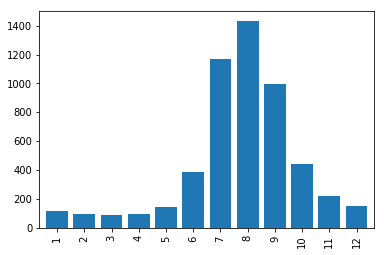

In [62]:
stn420=STNS['420'].groupby(STNS['420'].index.month).mean()
stn420.plot(kind='bar',width=0.8,legend=False)

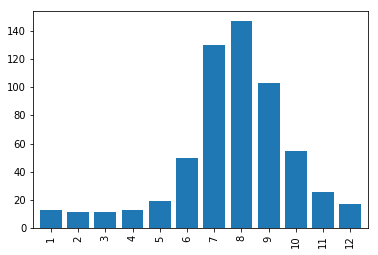

In [63]:
stn430=STNS['430'].groupby(STNS['430'].index.month).mean()
stn430.plot(kind='bar',width=0.8,legend=False)

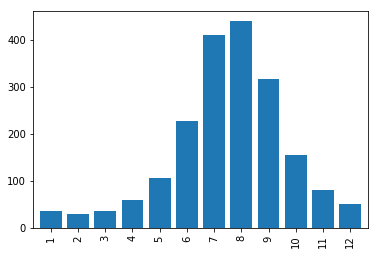

In [64]:
stn445=STNS['445'].groupby(STNS['445'].index.month).mean()
stn445.plot(kind='bar',width=0.8,legend=False)

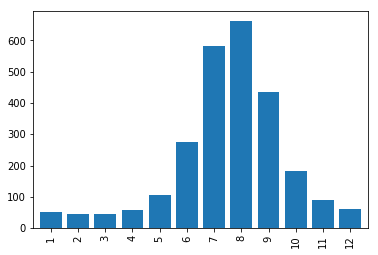

In [65]:
stn447=STNS['447'].groupby(STNS['447'].index.month).mean()
stn447.plot(kind='bar',width=0.8,legend=False)

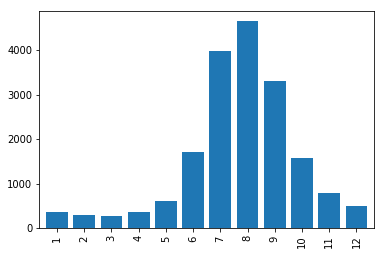

In [66]:
stn450=STNS['450'].groupby(STNS['450'].index.month).mean()
stn450.plot(kind='bar',width=0.8,legend=False)

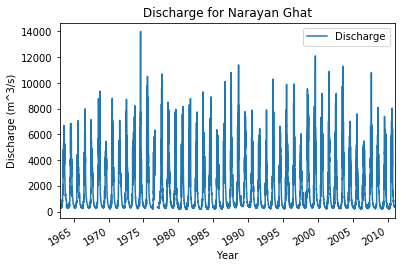

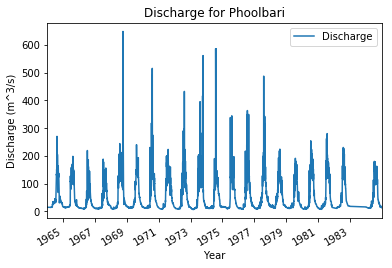

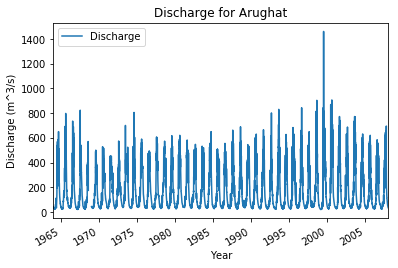

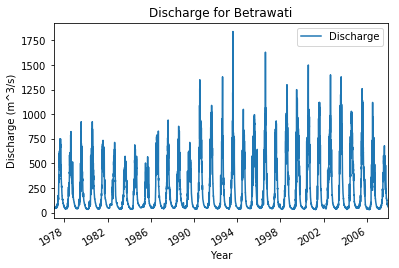

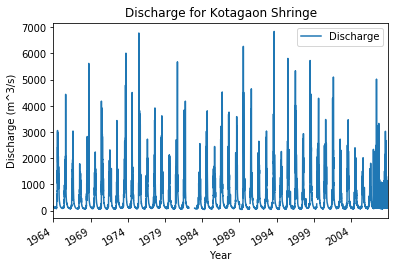

In [43]:
#Plotting the discharge for every station
for i in STNS.keys():
    STNS[i].plot()
    plt.title('Discharge for {0}'.format(STNS[i].name))
    plt.ylabel('Discharge (m^3/s)')
    plt.xlabel('Year')

In [44]:
files = list(glob.iglob('**/TA*',recursive=True))
files.sort()
STNS_temp = {}
for f in files:
    fold, stn_id, info = f.split('/')
    print (fold, stn_id, info)

temp 0607 TA060719.98
temp 0607 TA060719.99
temp 0607 TA060720.00
temp 0607 TA060720.01
temp 0607 TA060720.02
temp 0607 TA060720.03
temp 0607 TA060720.04
temp 0607 TA060720.05
temp 0607 TA060720.06
temp 0607 TA060720.07
temp 0607 TA060720.08
temp 0607 TA060720.09
temp 0804 TA080419.68
temp 0804 TA080419.69
temp 0804 TA080419.70
temp 0804 TA080419.71
temp 0804 TA080419.72
temp 0804 TA080419.73
temp 0804 TA080419.74
temp 0804 TA080419.75
temp 0804 TA080419.76
temp 0804 TA080419.77
temp 0804 TA080419.78
temp 0804 TA080419.79
temp 0804 TA080419.80
temp 0804 TA080419.81
temp 0804 TA080419.82
temp 0804 TA080419.83
temp 0804 TA080419.84
temp 0804 TA080419.85
temp 0804 TA080419.86
temp 0804 TA080419.87
temp 0804 TA080419.88
temp 0804 TA080419.89
temp 0804 TA080419.90
temp 0804 TA080419.91
temp 0804 TA080419.92
temp 0804 TA080419.93
temp 0804 TA080419.94
temp 0804 TA080419.95
temp 0804 TA080419.96
temp 0804 TA080419.97
temp 0804 TA080419.98
temp 0804 TA080419.99
temp 0804 TA080420.00
temp 0804 

##### Temperature data

In [45]:

def date_parser(doy, year):    
    return dt.datetime.strptime(doy.zfill(3)+year, '%j%Y')
    
files = list(glob.iglob('**/TA*',recursive=True))
files.sort()
STNS_temp = {}
for f in files:
    fold, stn_id, info = f.split('/')
    year = "".join(info[-5:].split('.'))
    with open(f) as fo:
        info = fo.readline().split()
        try:
            yr, var, stn_name = info[0], info[1].lower(), info[3].lower()
            
        except:
            yr = year
            stn_name = stn_id
                          
        data = fo.readlines()[:-1]
        data = [d.strip() for d in data]
        data = '\n'.join(data)
        with open('data.dump', 'w') as dump:
            dump.write(data)
                   
    parser = lambda date: date_parser(date, year=year)
    df = pd.read_table('data.dump', delim_whitespace=True, skiprows=1, names=['date', 'Tmax','Tmin'],
                       na_values= 'DNA', parse_dates=[0], date_parser=parser, index_col='date' )

    df['avg_T'] = df.mean(axis =1) # calculating average temp
    df = df.drop(['Tmax','Tmin'], axis=1) # removing tmin and tmax from dataframe   
    df.name = stn_name
    df.sid = stn_id
    df.columns = [stn_id]
    
    if stn_id not in STNS_temp.keys():
        STNS_temp[stn_id] = df
    else:
        STNS_temp[stn_id] = STNS_temp[stn_id].append(df)
        STNS_temp[stn_id].name = df.name
        STNS_temp[stn_id].sid = df.sid

In [46]:
STNS_temp.keys() #Checking so my keys are correct

dict_keys(['0607', '0804', '0814', '0902', '1055'])

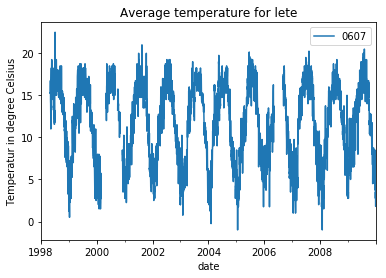

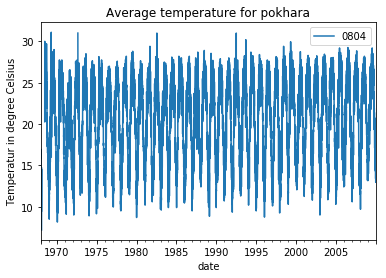

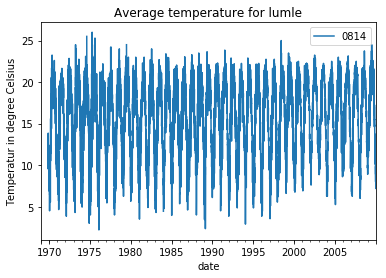

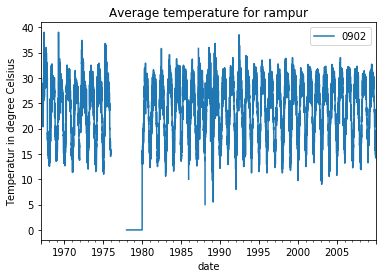

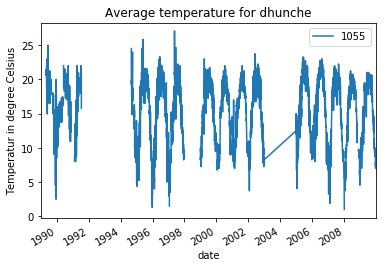

In [47]:
for i in STNS_temp.keys():
    STNS_temp[i].plot()
    plt.title('Average temperature for {0}'.format(STNS_temp[i].name))
    plt.ylabel('Temperatur in degree Celsius')

##### Precipitation data

In [48]:

Files = list(glob.iglob('**/AS*',recursive=True))
Files.sort()
STNS_pre = {}

for f in Files:   
    fds, stn_id, info = f.split('/')
    year = "".join(info[-5:].split('.'))     
    ws = [7,10]
    df = pd.read_fwf(f,widths=ws, header=None,names =['day','prec'],nrows=366,keep_default_na = True).drop('day',1)
    df = df.dropna(subset = ['prec'])
    data = df.apply(pd.to_numeric, errors='coerce') 
    data = data.set_index(pd.date_range(year, periods=len(data), freq='D'))
    all_data = pd.DataFrame(data)
    all_data[all_data < 0] = np.nan
    
    all_data.name = stn_id
    all_data.sid = stn_id  

    if stn_id not in STNS_pre.keys():
        STNS_pre[stn_id] = all_data
    else:
        STNS_pre[stn_id] = STNS_pre[stn_id].append(all_data)
        STNS_pre[stn_id].name = all_data.name
        STNS_pre[stn_id].sid = all_data.sid

In [49]:
STNS_pre.keys() #checking my keys

dict_keys(['0607', '0804', '0814', '0902', '1055'])

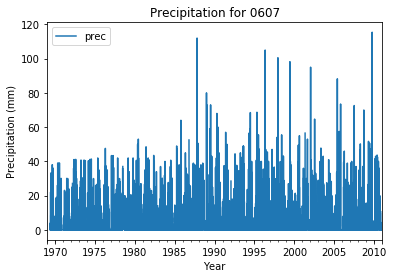

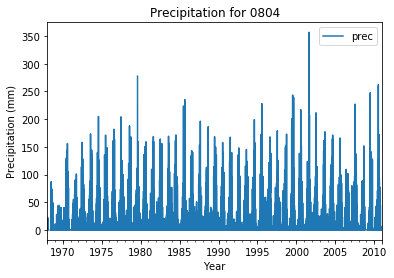

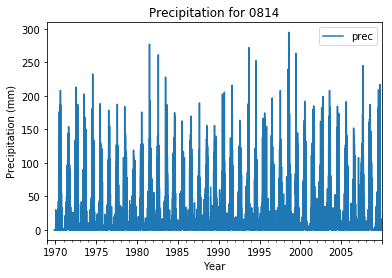

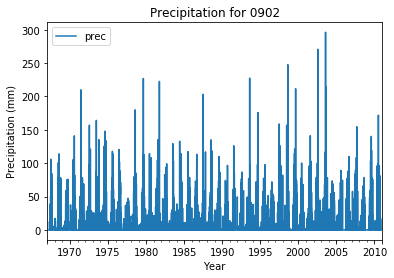

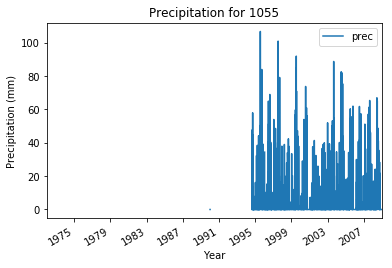

In [50]:
for i in STNS_pre.keys():
    STNS_pre[i].plot()
    plt.title('Precipitation for {0}'.format(STNS_pre[i].name))
    plt.xlabel('Year')
    plt.ylabel('Precipitation (mm)')